<a href="https://colab.research.google.com/github/sadhviksalver17726/ISYS5002-2024-SEMESTER1/blob/main/PROGRAMMING_ASSESMENT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# database connection
conn = sqlite3.connect('/content/Australian Energy dataset.db')

# Cursor Creation
cursor = conn.cursor()


# **Connection to Australian Energy Database**

In [ ]:
# Query to get the schema of the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

print("Tables in the database:")
for table in tables:
    print(table[0])

# For each table, get the schema
for table in tables:
    print(f"\nSchema of table {table[0]}:")
    cursor.execute(f"PRAGMA table_info({table[0]});")
    schema = cursor.fetchall()
    for column in schema:
        print(column)


Tables in the database:
EnergyConsumption

Schema of table EnergyConsumption:
(0, 'id', 'INTEGER', 0, None, 1)
(1, 'state', 'TEXT', 0, None, 0)
(2, 'fuel_type', 'TEXT', 0, None, 0)
(3, 'year', 'INTEGER', 0, None, 0)
(4, 'energy_consumption', 'REAL', 0, None, 0)
(5, 'gsp', 'REAL', 0, None, 0)


In [ ]:
# Example: Extracting data from'EnergyConsumption'
query = """
SELECT * FROM EnergyConsumption
"""
energy_data = pd.read_sql_query(query, conn)

# Displaying few rows of dataframe
energy_data.head()


,id,state,fuel_type,year,energy_consumption,gsp
0,1,New South Wales,Coal,2012,970.0,53000.0
1,2,New South Wales,Natural Gas,2012,780.0,53000.0
2,3,Victoria,Coal,2012,880.0,48000.0
3,4,Victoria,Natural Gas,2012,580.0,48000.0
4,5,Queensland,Coal,2012,1080.0,64000.0


In [ ]:
# Cleaning the data
energy_data.dropna(inplace=True)

# Group by state and aggregate the total energy consumption
total_consumption_by_state = energy_data.groupby('state')['energy_consumption'].sum().reset_index()

# Display the result
total_consumption_by_state

,state,energy_consumption
0,New South Wales,14680.0
1,Queensland,14860.0
2,Victoria,12400.0


#**Group A**

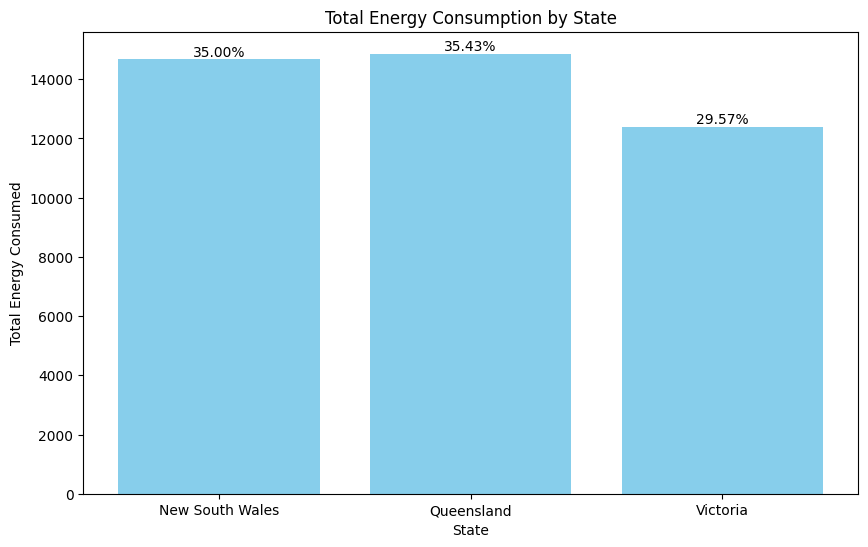

In [ ]:
# Total energy consumption for each state
total_energy_state = energy_data.groupby('state')['energy_consumption'].sum().reset_index()

# Total energy consumption across all states
total_energy_all_states = total_energy_state['energy_consumption'].sum()

# Percentage of total energy consumption for each state
total_energy_state['percentage'] = (total_energy_state['energy_consumption'] / total_energy_all_states) * 100

# Plotting the results
plt.figure(figsize=(10, 6))
bars = plt.bar(total_energy_state['state'], total_energy_state['energy_consumption'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Total Energy Consumed')
plt.title('Total Energy Consumption by State')

# Percentage values on the bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    percentage = total_energy_state.iloc[i]['percentage']
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

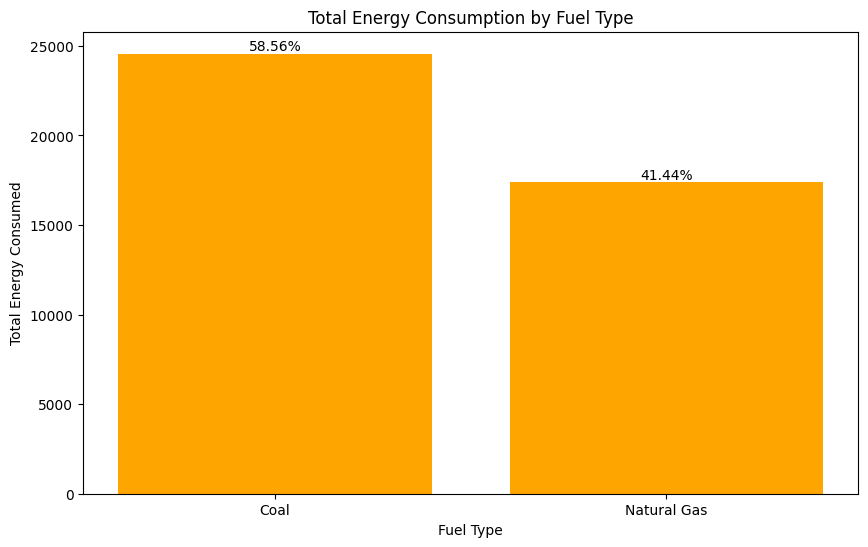

In [ ]:
# Total energy consumption by fuel type
total_energy_fuel = energy_data.groupby('fuel_type')['energy_consumption'].sum().reset_index()

# Total energy consumption across all fuel types
total_energy_all_fuel = total_energy_fuel['energy_consumption'].sum()

# Percentage of total energy consumption for each fuel type
total_energy_fuel['percentage'] = (total_energy_fuel['energy_consumption'] / total_energy_all_fuel) * 100

# Plotting the results
plt.figure(figsize=(10, 6))
bars = plt.bar(total_energy_fuel['fuel_type'], total_energy_fuel['energy_consumption'], color='orange')
plt.xlabel('Fuel Type')
plt.ylabel('Total Energy Consumed')
plt.title('Total Energy Consumption by Fuel Type')

# percentage values on the bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    percentage = total_energy_fuel.iloc[i]['percentage']
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

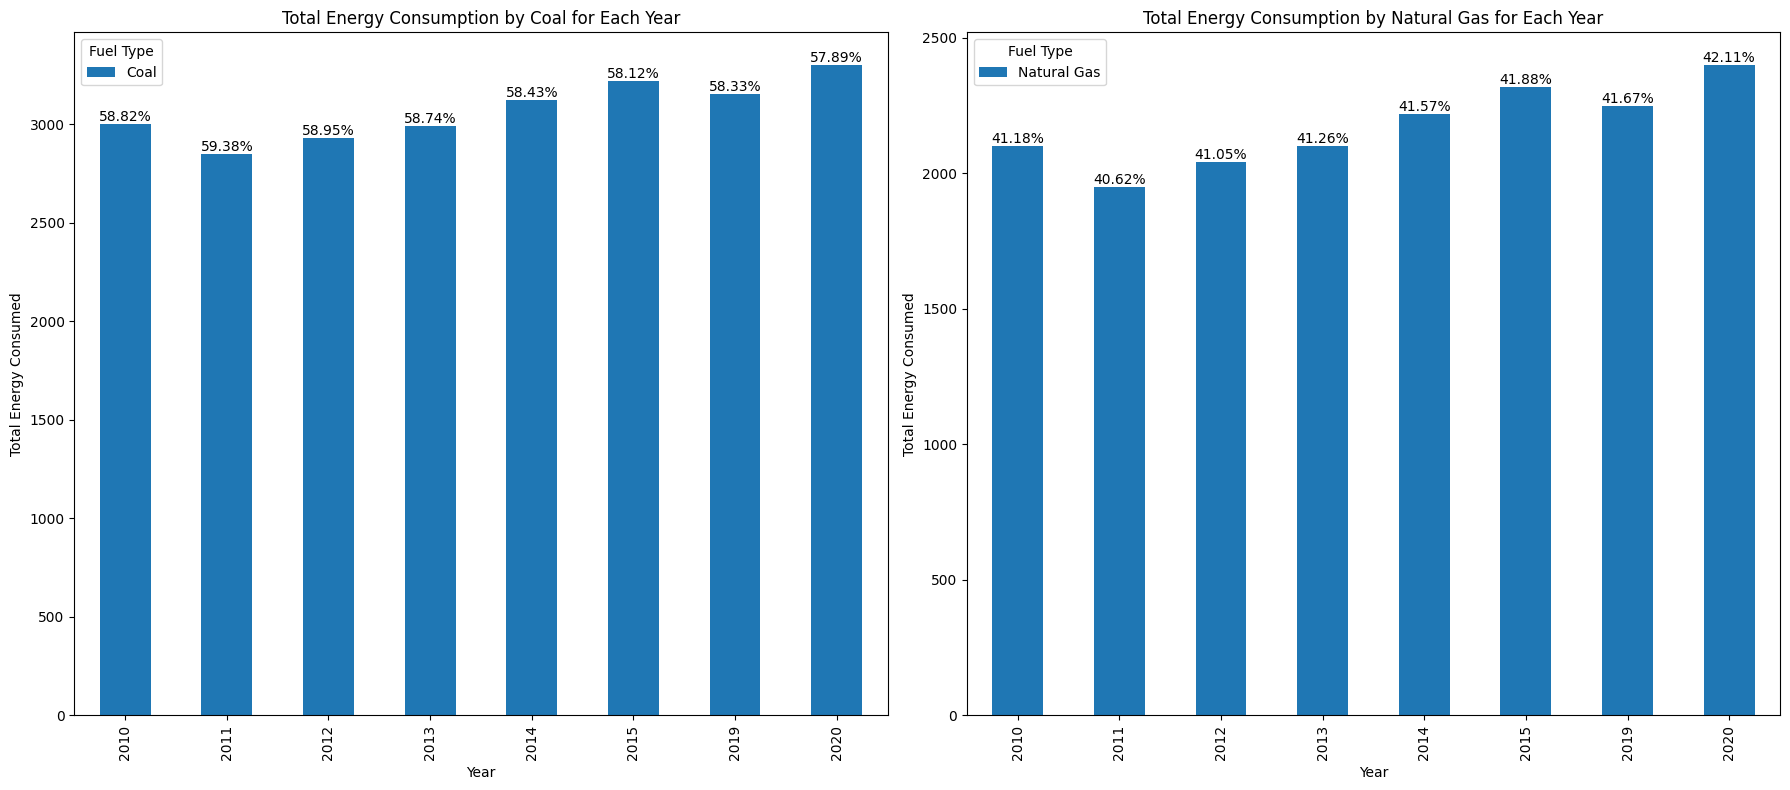

In [ ]:
# Total energy consumption by fuel type for each year
total_energy_fuel_year = energy_data.groupby(['year', 'fuel_type'])['energy_consumption'].sum().unstack().fillna(0)

# Subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plotting the results for each fuel type
for i, fuel_type in enumerate(total_energy_fuel_year.columns):
    # Plot for each fuel type
    ax = axes[i]
    total_energy_fuel_year[fuel_type].plot(kind='bar', stacked=True, ax=ax)

    # Percentage values on the bars
    total_energy_fuel_year_percentage = total_energy_fuel_year.div(total_energy_fuel_year.sum(axis=1), axis=0) * 100
    for j, bar in enumerate(ax.patches):
        height = bar.get_height()
        percentage = total_energy_fuel_year_percentage.iloc[j][fuel_type]
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

    ax.set_xlabel('Year')
    ax.set_ylabel('Total Energy Consumed')
    ax.set_title(f'Total Energy Consumption by {fuel_type} for Each Year')
    ax.legend(title='Fuel Type')

plt.tight_layout()
plt.show()

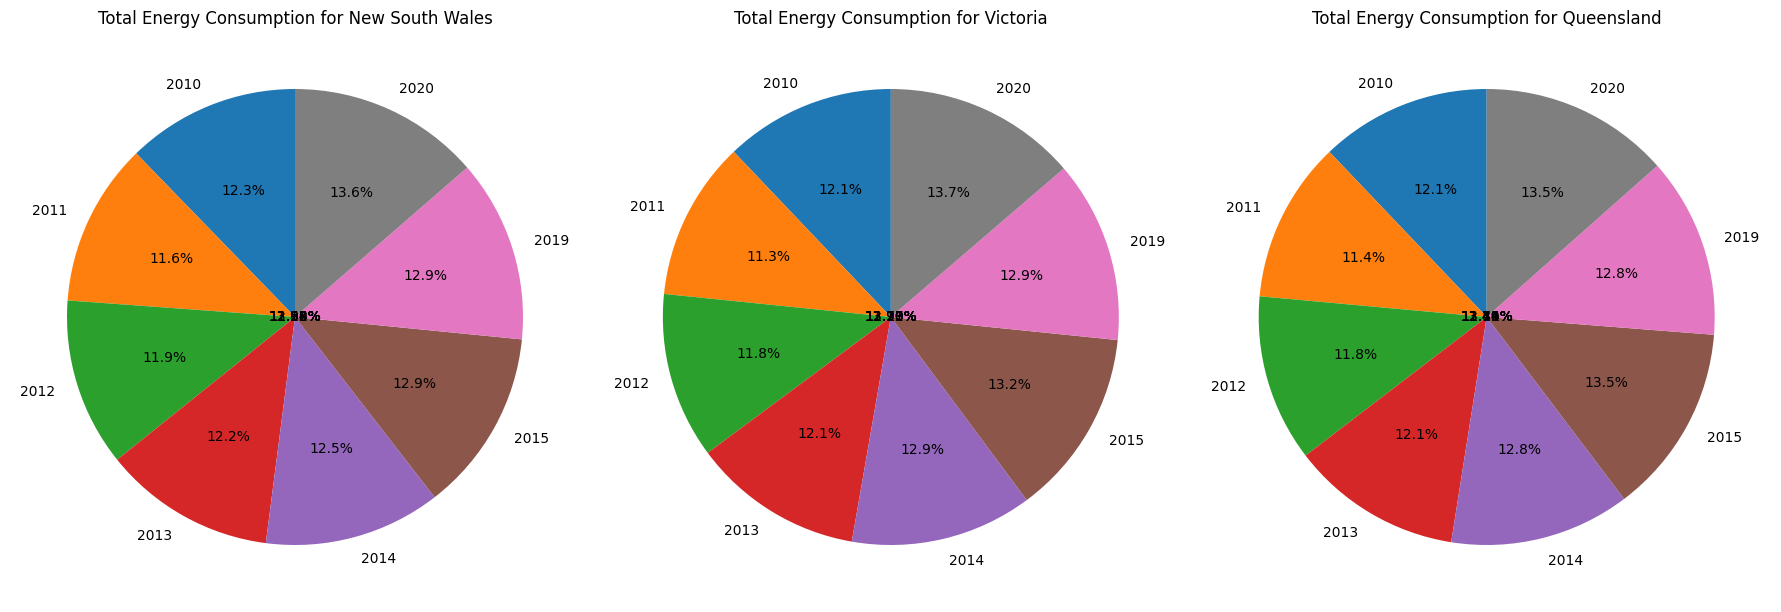

In [ ]:
# Three states for pie plots
states_for_pie = ['New South Wales', 'Victoria', 'Queensland']

# subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting the results for each state
for i, state in enumerate(states_for_pie):
    ax = axes[i]
    energy_data_state = total_energy_state_year.loc[:, state]
    ax.pie(energy_data_state, labels=energy_data_state.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Total Energy Consumption for {state}')

    # Percentage values on the pie slices
    total_energy_state_year_percentage = energy_data_state / energy_data_state.sum() * 100
    for j, pie_wedge in enumerate(ax.patches):
        percentage = total_energy_state_year_percentage.iloc[j]
        ax.text(pie_wedge.center[0], pie_wedge.center[1], f'{percentage:.2f}%', ha='center', va='center')

plt.tight_layout()
plt.show()

# **Group-B**

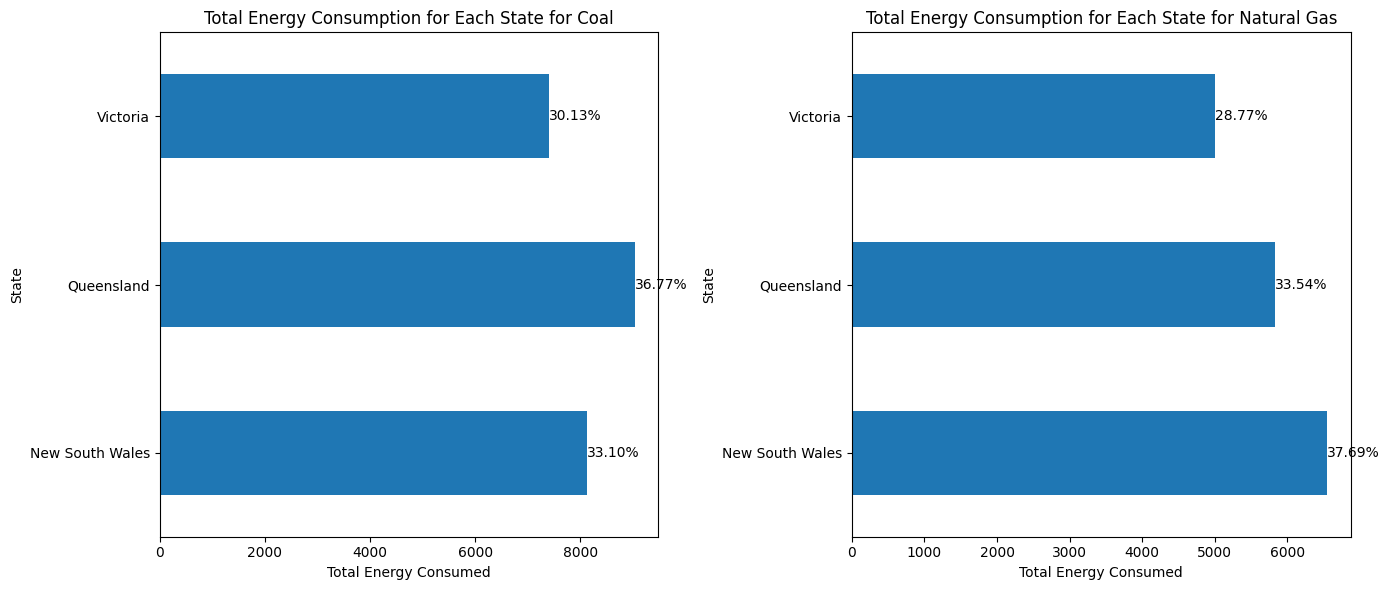

In [ ]:
# Choose two gas types for horizontal bar plots
gas_types_for_bar = ['Coal', 'Natural Gas']

# Create subplots for horizontal bar plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the results for each gas type
for i, gas_type in enumerate(gas_types_for_bar):
    # Plot for each gas type
    ax = axes[i]
    total_energy_state_fuel[gas_type].plot(kind='barh', ax=ax)
    ax.set_yticklabels(total_energy_state_fuel.index)
    ax.set_ylabel('State')
    ax.set_xlabel('Total Energy Consumed')
    ax.set_title(f'Total Energy Consumption for Each State for {gas_type}')

    # Add percentage values next to each bar
    total_energy_gas_type = total_energy_state_fuel[gas_type].sum()
    for j, val in enumerate(total_energy_state_fuel[gas_type]):
        percentage = (val / total_energy_gas_type) * 100
        ax.text(val, j, f'{percentage:.2f}%', ha='left', va='center')

plt.tight_layout()
plt.show()


# **Group-C**

Data with Energy Intensity:
             state  year  energy_consumption      gsp  energy_intensity
0  New South Wales  2012               970.0  53000.0          0.018302
1  New South Wales  2012               780.0  53000.0          0.014717
2         Victoria  2012               880.0  48000.0          0.018333
3         Victoria  2012               580.0  48000.0          0.012083
4       Queensland  2012              1080.0  64000.0          0.016875


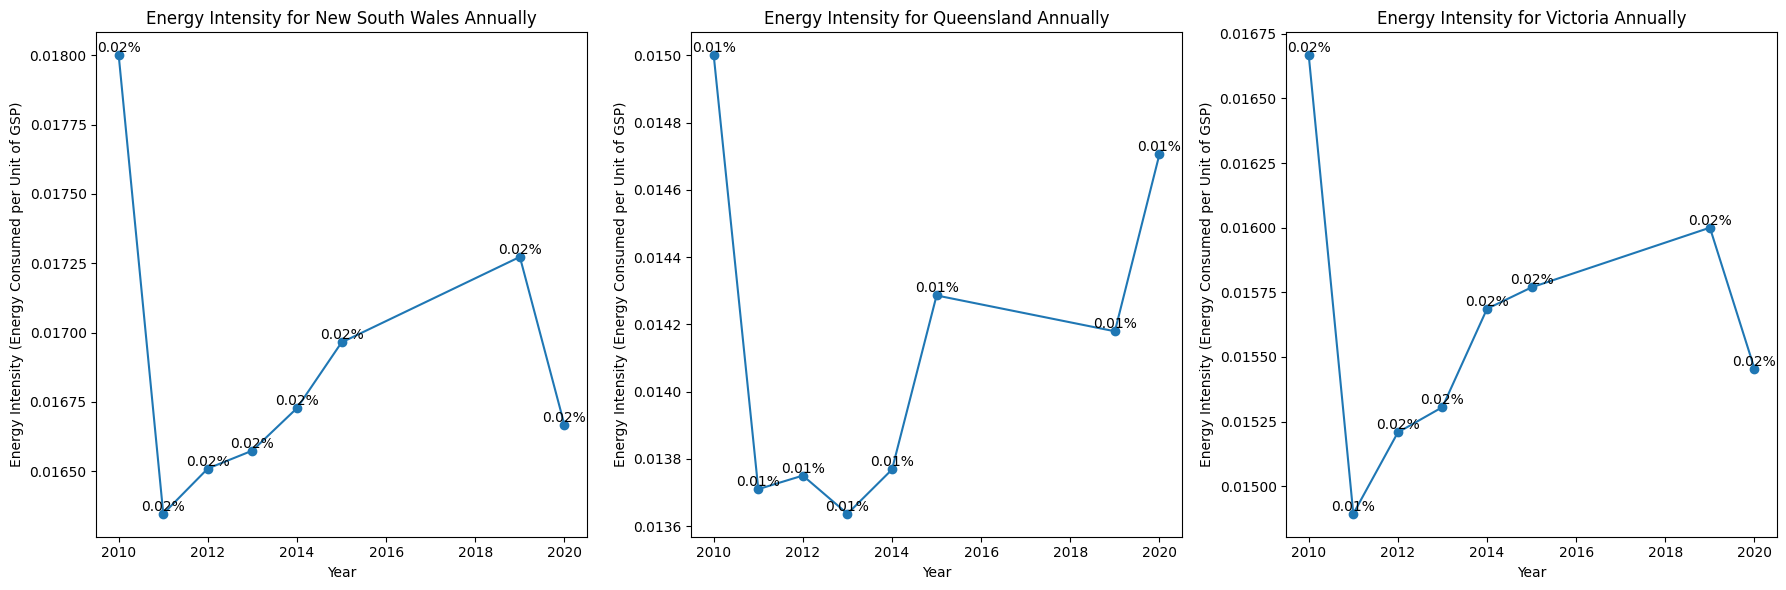

In [ ]:
query = """
SELECT state, year, energy_consumption, gsp
FROM EnergyConsumption
"""
energy_data = pd.read_sql_query(query, conn)

# Compute energy intensity (energy consumption per unit of GSP)
energy_data['energy_intensity'] = energy_data['energy_consumption'] / energy_data['gsp']

# Display the first few rows of the dataframe with the new column
print("Data with Energy Intensity:")
print(energy_data.head())

# Compute the average energy intensity per state per year
energy_intensity_state_year = energy_data.groupby(['year', 'state'])['energy_intensity'].mean().unstack().fillna(0)


# Create subplots for each state
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot the results for each state
for i, state in enumerate(energy_intensity_state_year.columns):
    # Plot for each state
    ax = axes[i]
    state_intensity_data = energy_intensity_state_year[state]
    state_intensity_data.plot(kind='line', marker='o', ax=ax)
    ax.set_xlabel('Year')
    ax.set_ylabel('Energy Intensity (Energy Consumed per Unit of GSP)')
    ax.set_title(f'Energy Intensity for {state} Annually')

    # Add percentage values above each data point
    for year, val in state_intensity_data.items():
        ax.text(year, val, f'{val:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()